In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import time

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/intrution detection/nsl-kdd.csv')
df.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0.0,tcp,http,SF,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,tcp,smtp,SF,3065.0,331.0,0.0,0.0,0.0,0.0,...,119.0,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00,normal
96,0.0,udp,other,SF,102.0,102.0,0.0,0.0,0.0,0.0,...,1.0,0.14,0.29,0.14,0.00,0.00,0.00,0.00,0.00,normal
97,0.0,tcp,http,SF,259.0,750.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.25,0.03,0.00,0.00,0.00,0.00,normal
98,1082.0,udp,other,SF,147.0,105.0,0.0,0.0,0.0,0.0,...,2.0,0.01,0.42,0.86,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148518 entries, 0 to 148517
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148516 non-null  float64
 1   protocol_type                148518 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  float64
 5   dst_bytes                    148517 non-null  float64
 6   land                         148517 non-null  float64
 7   wrong_fragment               148517 non-null  float64
 8   urgent                       148517 non-null  float64
 9   hot                          148517 non-null  float64
 10  num_failed_logins            148517 non-null  float64
 11  logged_in                    148517 non-null  float64
 12  num_compromised              148517 non-null  float64
 13 

<ipython-input-6-8c9034a13e84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

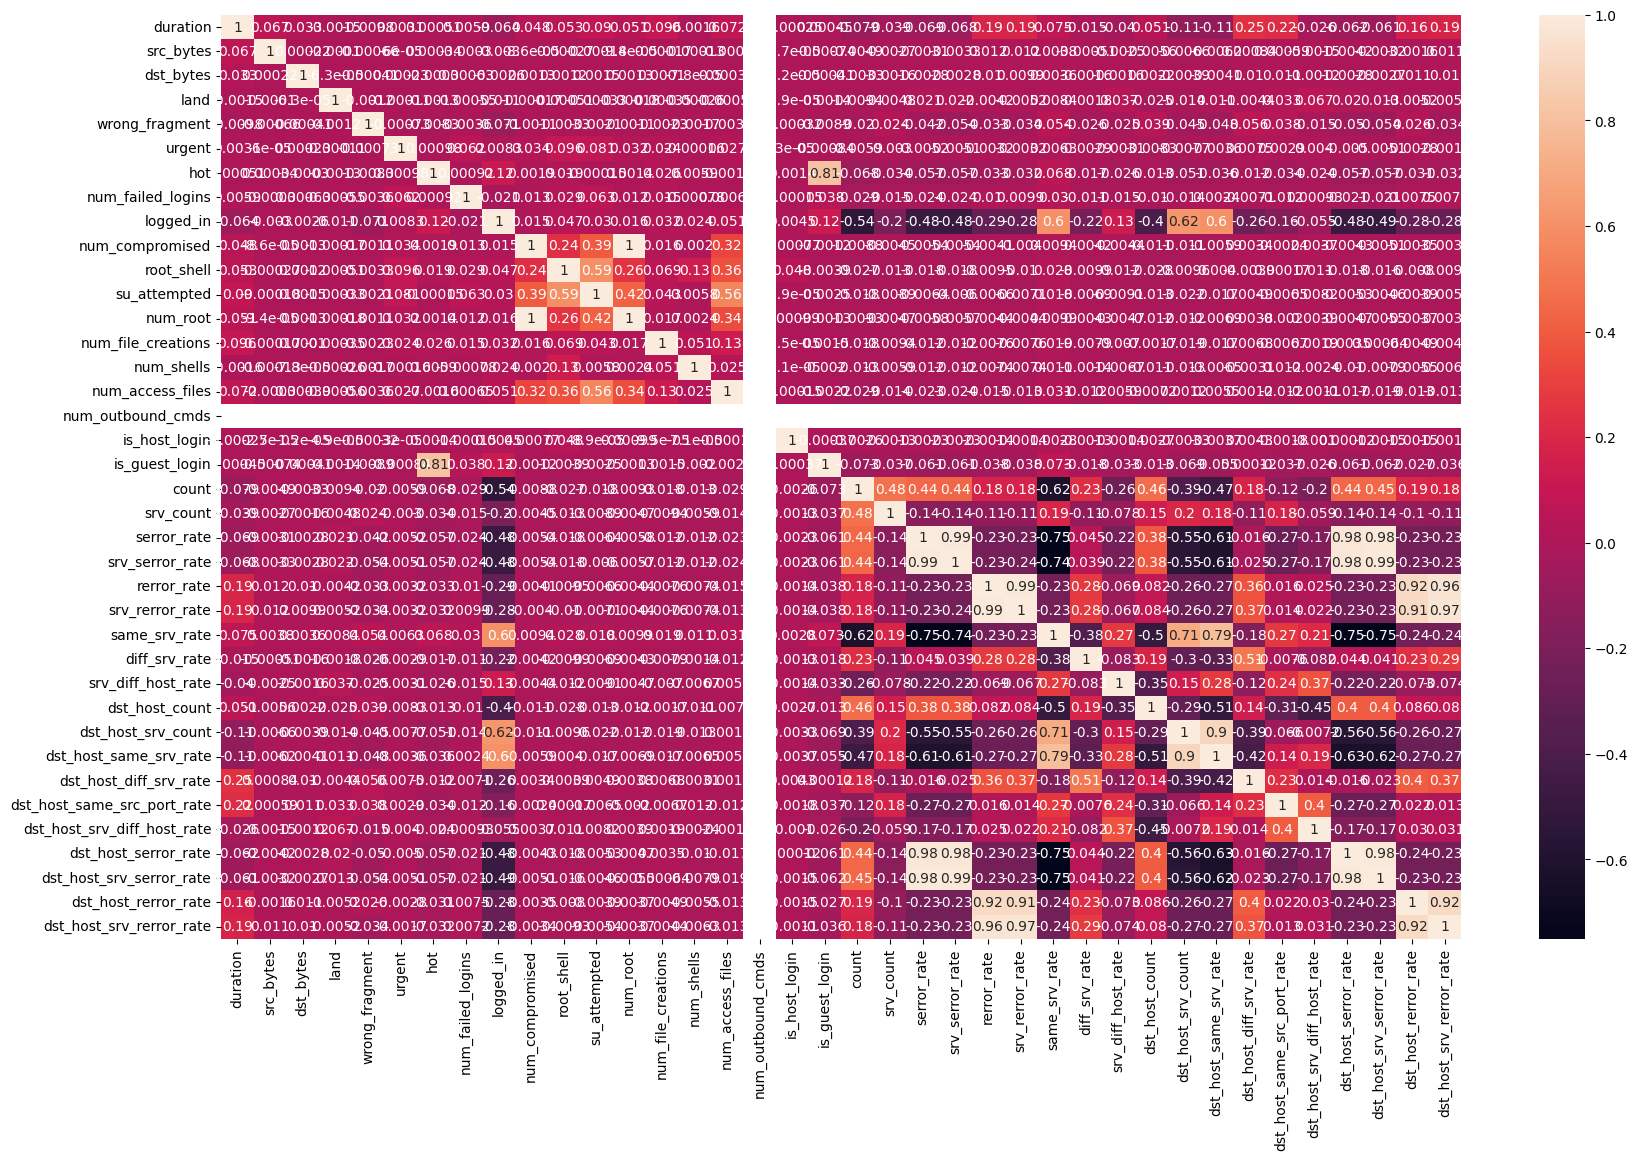

In [6]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

In [7]:
df['labels'].value_counts()

normal             78588
neptune            47868
satan               4331
ipsweep             4078
portsweep           3302
smurf               3186
nmap                1699
back                1183
warezclient          997
teardrop             996
guess_passwd         464
mscan                310
warezmaster          299
pod                  236
apache2              228
processtable         211
snmpguess             99
mailbomb              94
saint                 93
buffer_overflow       47
snmpgetattack         43
httptunnel            41
land                  20
multihop              16
rootkit               14
loadmodule            13
imap                  13
ftp_write             10
ps                     9
sendmail               8
phf                    5
perl                   4
xlock                  4
xterm                  3
spy                    2
named                  2
xsnoop                 1
Name: labels, dtype: int64

In [8]:
cats = list(df.select_dtypes('object').columns.values)
cats

['protocol_type', 'service', 'flag', 'labels']

In [9]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [19]:
# Redistribute across common attack class
def change_labels(df):
  df.labels.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm','ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop','ipsweep','mscan','nmap','portsweep','saint','satan','buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'Attack',inplace=True)

In [22]:
change_labels(df)

In [23]:
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.111131,-0.127646,-0.698008,0.746188,-0.007398,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.827905,-0.790945,-0.279346,0.073662,-0.285802,-0.627173,-0.613050,-0.238208,-0.386027,normal
1,-0.111131,2.222674,0.770068,0.746188,-0.007462,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-1.044379,-1.169777,2.710973,2.375243,-0.285802,-0.627173,-0.613050,-0.398460,-0.386027,normal
2,-0.111131,-0.127646,1.075917,-0.726045,-0.007489,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.818885,-0.946935,-0.174423,-0.477421,-0.285802,1.644436,1.653504,-0.398460,-0.386027,Attack
3,-0.111131,-0.127646,-0.453329,0.746188,-0.007446,-0.002450,-0.013484,-0.08785,-0.008257,-0.094351,...,1.246640,1.058646,-0.436732,-0.380171,0.072630,-0.559025,-0.590384,-0.398460,-0.355219,normal
4,-0.111131,-0.127646,-0.453329,0.746188,-0.007452,-0.004538,-0.013484,-0.08785,-0.008257,-0.094351,...,1.246640,1.058646,-0.436732,-0.477421,-0.285802,-0.627173,-0.613050,-0.398460,-0.386027,normal
5,-0.111131,-0.127646,1.075917,-2.198277,-0.007489,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.882023,-1.013787,-0.069499,-0.477421,-0.285802,-0.627173,-0.613050,2.806570,2.694856,Attack
6,-0.111131,-0.127646,1.075917,-0.726045,-0.007489,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.972221,-1.080640,-0.174423,-0.477421,-0.285802,1.644436,1.653504,-0.398460,-0.386027,Attack
7,-0.111131,-0.127646,1.075917,-0.726045,-0.007489,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.918102,-1.036071,-0.069499,-0.477421,-0.285802,1.644436,1.653504,-0.398460,-0.386027,Attack
8,-0.111131,-0.127646,1.198256,-0.726045,-0.007489,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.845944,-0.969219,-0.174423,-0.477421,-0.285802,1.644436,1.653504,-0.398460,-0.386027,Attack
9,-0.111131,-0.127646,1.075917,-0.726045,-0.007489,-0.004651,-0.013484,-0.08785,-0.008257,-0.094351,...,-0.936142,-1.058356,-0.121961,-0.477421,-0.285802,1.644436,1.653504,-0.398460,-0.386027,Attack


In [24]:
df['labels'].value_counts()

normal    78588
Attack    69929
Name: labels, dtype: int64

In [25]:
sns.countplot(df['labels'], label = "Count")

ValueError: ignored

In [11]:
# creating dummies via pandas to convert categorical variables to numerical

diagnosis = pd.get_dummies(df['labels'], drop_first=True)
dl = df.iloc[:,1:41]
df = pd.concat([labels, dl], axis=1)
df.rename(columns={'M': 'Diagnosis', 'concave points_mean': 'concave_points_mean'}, inplace= True)
print(df.shape)
df.head()


In [12]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0.0,2,20,9,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,3,44,9,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,2,49,5,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0.0,2,24,9,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,2,24,9,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [13]:
# distribution of attack classes
df.labels.value_counts()

normal             78588
neptune            47868
satan               4331
ipsweep             4078
portsweep           3302
smurf               3186
nmap                1699
back                1183
warezclient          997
teardrop             996
guess_passwd         464
mscan                310
warezmaster          299
pod                  236
apache2              228
processtable         211
snmpguess             99
mailbomb              94
saint                 93
buffer_overflow       47
snmpgetattack         43
httptunnel            41
land                  20
multihop              16
rootkit               14
loadmodule            13
imap                  13
ftp_write             10
ps                     9
sendmail               8
phf                    5
perl                   4
xlock                  4
xterm                  3
spy                    2
named                  2
xsnoop                 1
Name: labels, dtype: int64

In [14]:
# creating a dataframe with two labels (normal and attack)
label = pd.DataFrame(df.labels)

In [15]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = df.select_dtypes(include='number').columns
data = standardization(df,numeric_col)

In [16]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
#le2 = preprocessing.LabelEncoder()
##enc_label = label.apply(le2.fit_transform)
#data['intrusion'] = enc_label
#print(data.shape)
#data

In [17]:
df['intrusion'].value_counts()

KeyError: ignored

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x="intrusion", y='srv_rerror_rate', data=df,
            label="intrusion", color="r")

In [ ]:
y= df['intrusion']
X= df.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X.shape,'\ny_train has shape:',y.shape)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y)

X_data=np.array(X)
y_data=np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =20)

In [ ]:
from imblearn.over_sampling import SMOTE
#resampling with smotetomek
X_train["protocol"] = X_train["protocol"].astype(int).replace("udp", 1)
smt=SMOTE(random_state=0)
X_smt,y_smt =smt.fit_resample(X_train.values,y_train)
pd.value_counts(y_smt)